# 1. Face Detection

**Request parameters**:
- image: the image data. (opened with function `open()`)

**Response data**:
- faces: a list of 
    - data: face data; a list of 3-list [R, G, B]. (flattened with row first)
    - size: the size of face; a tuple (width, heigh)


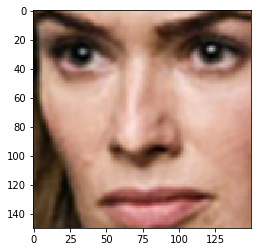

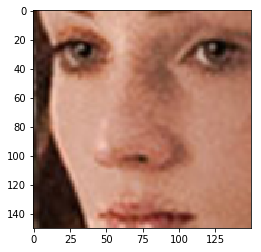

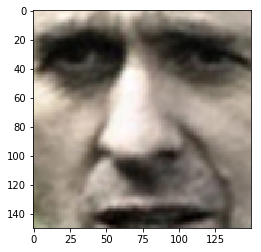

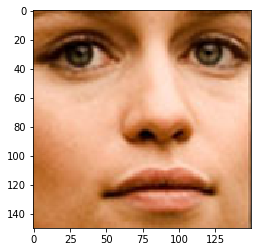

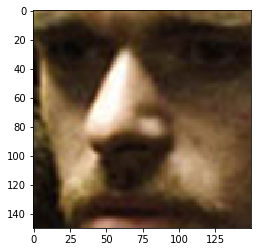

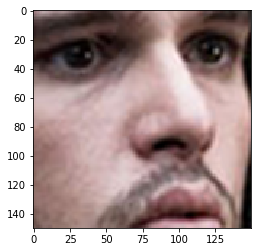

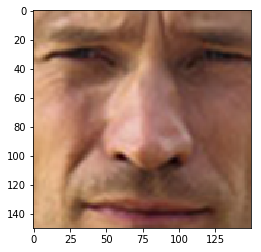

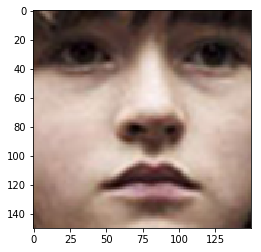

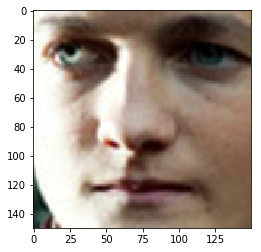

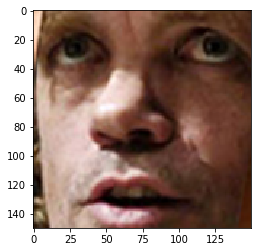

In [61]:
# Web request
import requests
import os
# Image manipulation
from PIL import Image
from pylab import *

host = 'http://127.0.0.1:8000/' # host address of our API
resource = 'commands/face_detection/' # resouce link

api_key = '127069d35409f8724aeef1a202fcefa97822c786' # your token
appID = '3027450565' # the appID of target app

# send requests
files = {'image': open('got.jpg')}
data = {'appID': appID}
headers = {'Authorization': 'Token '+api_key}
response = requests.post(os.path.join(host, resource), files=files, data=data, headers=headers)

# receive response
faces = response.json()['faces']

for face in faces:
    face_data = [(pixel[0], pixel[1], pixel[2]) for pixel in face['data']] # convert to tuple

    face_image = Image.new(mode='RGB', size=face['size'])
    face_image.putdata(face_data)
    
    figure()
    imshow(face_image)
    show()

RGB
(1296000, 3)


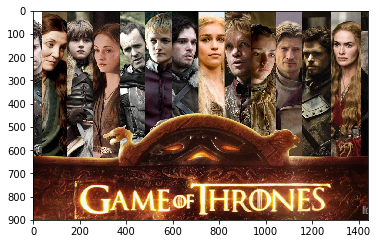

In [49]:
image = Image.open("got.jpg")
image_out = Image.new(image.mode,image.size)
print(image.mode)
pixels = list(image.getdata())
print((np.asarray(pixels)).shape)
image_out.putdata(pixels)
imshow(image_out)
show()